# Analyses de la résilience d'un essaim de nano-satellites

## Import packages

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial.distance import euclidean
import IPython.display as display

from swarm_sim import *



%matplotlib inline

## Représentation spatiale

In [2]:
PATH = 'Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
1,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
2,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06
3,-4.167305e+05,-4.253905e+05,-4.340304e+05,-4.426496e+05,-4.512477e+05,-4.598243e+05,-4.683791e+05,-4.769116e+05,-4.854214e+05,-4.939082e+05,...,1.408579e+06,1.411846e+06,1.415105e+06,1.418356e+06,1.421601e+06,1.424838e+06,1.428069e+06,1.431291e+06,1.434507e+06,1.437715e+06
4,-7.114496e+05,-7.251144e+05,-7.387446e+05,-7.523398e+05,-7.658991e+05,-7.794220e+05,-7.929078e+05,-8.063558e+05,-8.197656e+05,-8.331364e+05,...,2.332869e+06,2.337947e+06,2.343013e+06,2.348067e+06,2.353110e+06,2.358140e+06,2.363159e+06,2.368165e+06,2.373159e+06,2.378141e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-7.867440e+05,-8.000225e+05,-8.132638e+05,-8.264673e+05,-8.396324e+05,-8.527584e+05,-8.658449e+05,-8.788911e+05,-8.918966e+05,-9.048607e+05,...,2.339859e+06,2.344851e+06,2.349831e+06,2.354798e+06,2.359754e+06,2.364697e+06,2.369628e+06,2.374546e+06,2.379453e+06,2.384347e+06
296,-1.986689e+06,-1.979404e+06,-1.972028e+06,-1.964559e+06,-1.956999e+06,-1.949349e+06,-1.941607e+06,-1.933776e+06,-1.925855e+06,-1.917844e+06,...,3.628149e+06,3.622165e+06,3.616163e+06,3.610142e+06,3.604102e+06,3.598044e+06,3.591967e+06,3.585872e+06,3.579758e+06,3.573625e+06
297,-4.498133e+05,-4.582313e+05,-4.666290e+05,-4.750062e+05,-4.833624e+05,-4.916972e+05,-5.000104e+05,-5.083015e+05,-5.165702e+05,-5.248161e+05,...,1.437507e+06,1.440764e+06,1.444012e+06,1.447253e+06,1.450486e+06,1.453712e+06,1.456930e+06,1.460140e+06,1.463343e+06,1.466537e+06
298,-7.725334e+05,-7.858227e+05,-7.990774e+05,-8.122967e+05,-8.254803e+05,-8.386273e+05,-8.517374e+05,-8.648099e+05,-8.778443e+05,-8.908399e+05,...,2.392311e+06,2.397364e+06,2.402405e+06,2.407433e+06,2.412448e+06,2.417451e+06,2.422441e+06,2.427418e+06,2.432382e+06,2.437333e+06


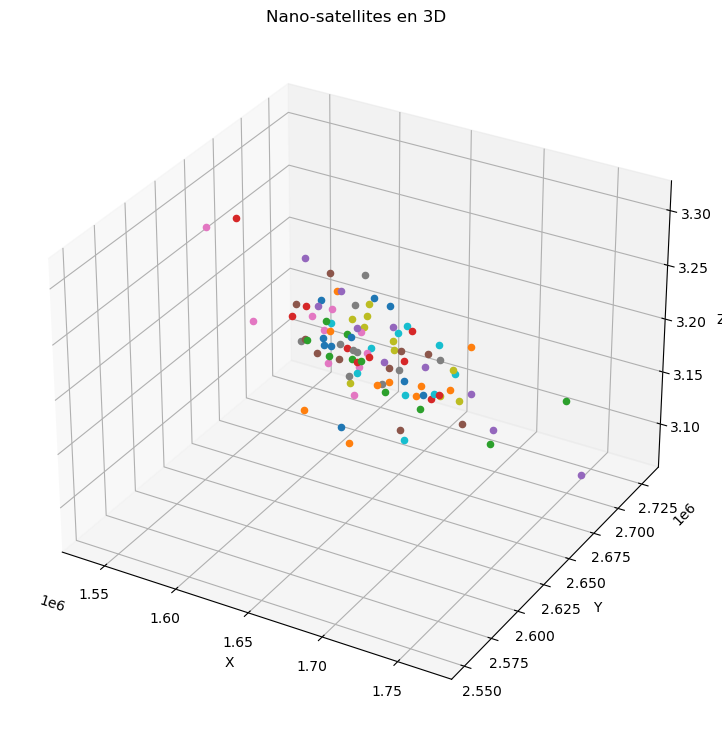

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fb37a932ca0> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

<Figure size 1500x900 with 1 Axes>

In [4]:
for t in range(0, 10000, 100):
    n_sats = 100
    # Extraire les positions
    positions = []
    for i in range(n_sats):
        x, y, z = df.iloc[i*3:i*3+3][t].values
        positions.append((x, y, z))

    # Construire le graphe
    G = nx.Graph()

    # Ajouter les nœuds
    for i, pos in enumerate(positions):
        G.add_node(i, position=pos)
    
    # --- Visualisation 3D ---
    fig = plt.figure(figsize=(15, 9)) 
    ax = fig.add_subplot(111, projection='3d')

    # Dessiner les nœuds
    for i, (x, y, z) in enumerate(positions):
        ax.scatter(x, y, z)

    # Dessiner les arêtes
    for (i, j) in G.edges():
        x = [positions[i][0], positions[j][0]]
        y = [positions[i][1], positions[j][1]]
        z = [positions[i][2], positions[j][2]]
        ax.plot(x, y, z, c='gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("Nano-satellites en 3D")
    display.clear_output(wait=True)
    plt.show()